<a href="https://colab.research.google.com/github/ashleydelarm/Capstone/blob/main/Pre_Trained_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import pandas
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import sys
import os
import numpy as np
import random
import torch
import time
import tensorflow_hub as hub

In [4]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [5]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/ColabNotebooks/asl/'):
    for filename in filenames:
      os.path.join(dirname, filename)

In [6]:
import warnings
warnings.filterwarnings('ignore')

import os, numpy as np, pandas as pd, matplotlib.pyplot as plt

from PIL import Image

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

In [7]:
os.chdir('/content/drive/MyDrive/ColabNotebooks/asl/')
os.listdir()

['asl_alphabet_train', 'asl_alphabet_test']

In [8]:
# Training and test paths
train_path = '/content/drive/MyDrive/ColabNotebooks/asl/asl_alphabet_train/asl_alphabet_train/'
test_path = '/content/drive/MyDrive/ColabNotebooks/asl/asl_alphabet_test/asl_alphabet_test/'

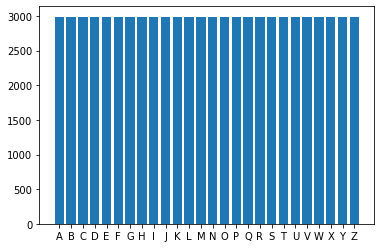

In [8]:
# Class imbalance identification
classes = os.listdir(train_path)
nos = []
for i in classes:
    nos.append(len(os.listdir(train_path+i)))
    
plt.bar(classes, nos)
plt.show()

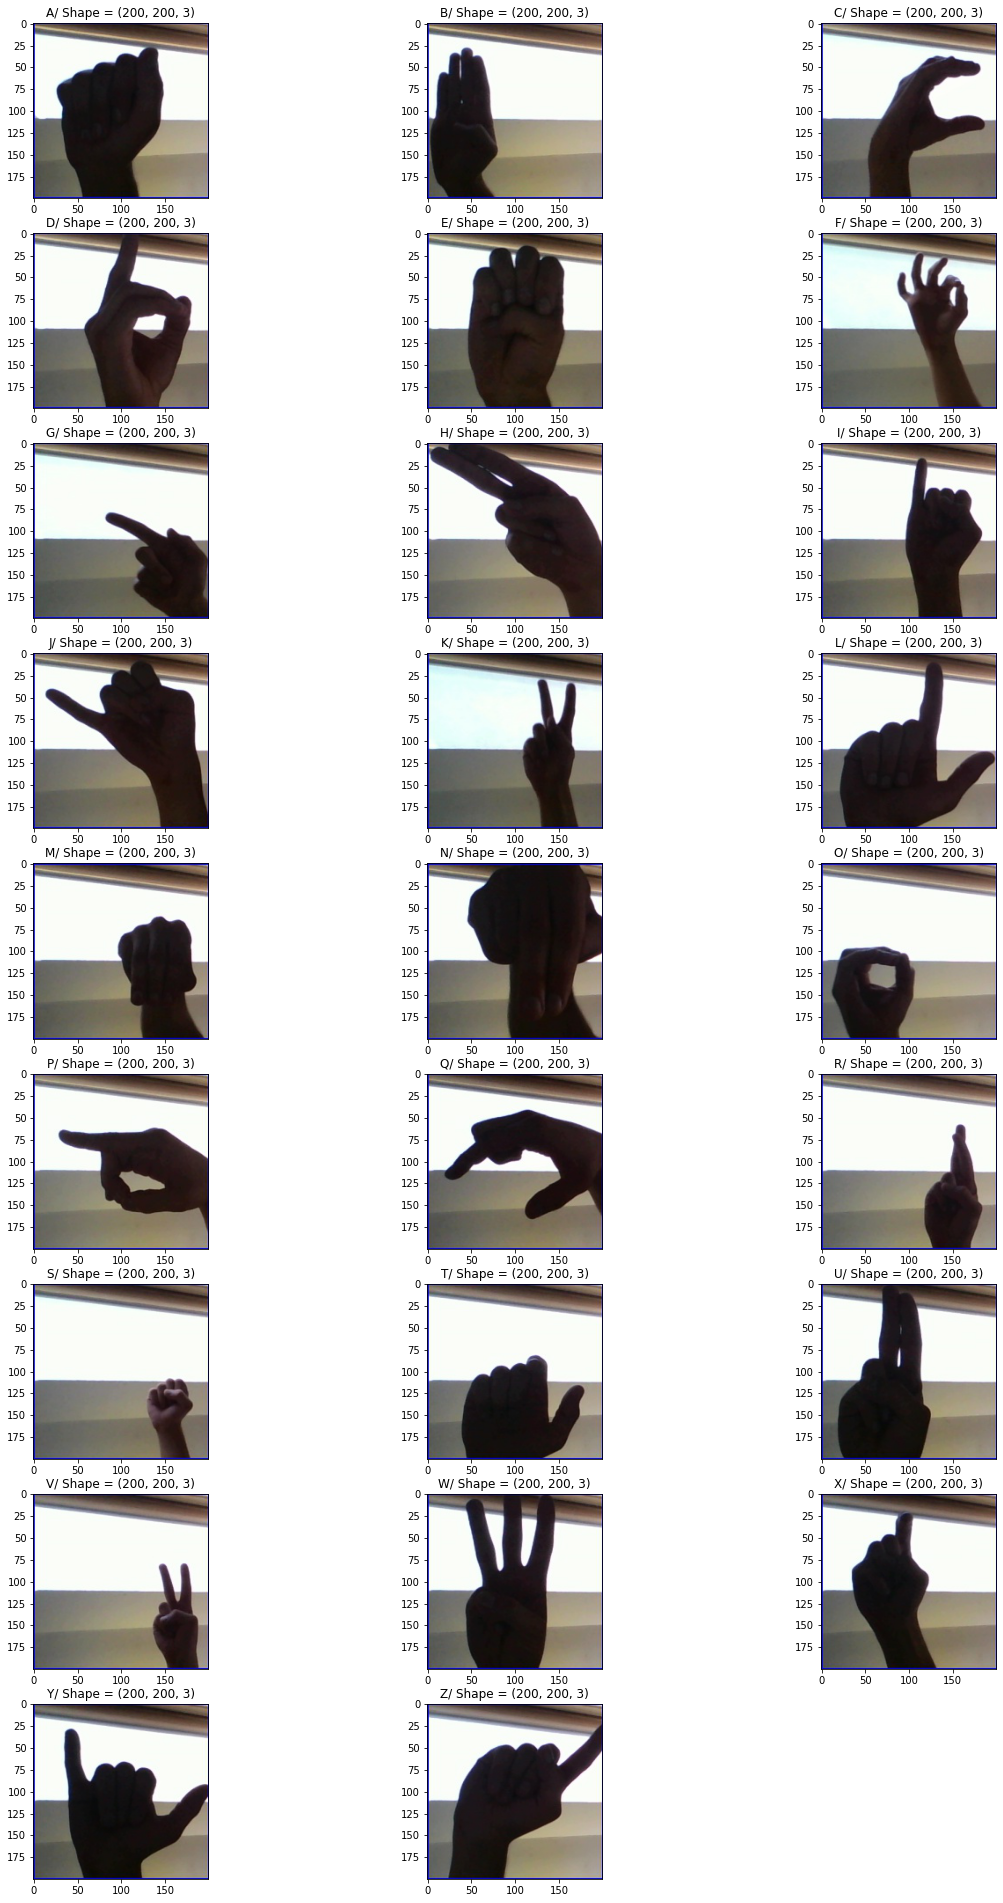

In [9]:
plt.figure(figsize=(20,38))
for i in enumerate(classes):
    image = os.listdir(train_path+i[1])[0]
    image = Image.open(train_path+i[1]+'/'+image)
    image = np.asarray(image)
    plt.subplot(10,3,i[0]+1)
    plt.imshow(image)
    plt.title('{0}/ Shape = {1}'.format(i[1], image.shape))
plt.show()

In [9]:
# dimensions of our images.
img_width = 200
img_height = 200

#we will feed the training images to the neural network
#in batches of 32 images at a time so we don't have 
#to load the entire data set into memory
batch_size = 26

In [10]:
# Creating train and validation sets

datagen = ImageDataGenerator(validation_split=0.2)
datagen2 = ImageDataGenerator(rescale=1.0/255.0)

train_data = datagen.flow_from_directory(train_path, subset='training')
val_data = datagen.flow_from_directory(train_path, subset='validation')
#test_data = datagenTest.flow_from_directory(test_path)

Found 62192 images belonging to 26 classes.
Found 15548 images belonging to 26 classes.


In [11]:
# dimensions of our images.
img_width = 200
img_height = 200

#the directories where our train and test data is
test_data_dir = '/content/drive/MyDrive/ColabNotebooks/asl/asl_alphabet_test/asl_alphabet_test'   #286 images
train_data_dir = '/content/drive/MyDrive/ColabNotebooks/asl/asl_alphabet_train/asl_alphabet_train'  #77,740 images
train_data_sml = '/content/drive/MyDrive/ColabNotebooks/asl_small/asl_small_train/asl_small_train' #1300 images (small version)


#we will feed the training images to the neural network
#in batches of 32 images at a time so we don't have 
#to load the entire data set into memory
batch_size = 32

In [12]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator_sml = train_datagen.flow_from_directory(
    train_data_sml,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator_sml = train_datagen.flow_from_directory(
    train_data_sml, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

test_generator = datagen.flow_from_directory(
    test_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical') # set as validation data

Found 1040 images belonging to 26 classes.
Found 260 images belonging to 26 classes.
Found 62192 images belonging to 26 classes.
Found 15548 images belonging to 26 classes.
Found 286 images belonging to 26 classes.


In [13]:
import os 
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,BatchNormalization,Conv2D,MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from  skimage.transform import resize
from tensorflow.keras.utils import to_categorical
from keras.applications.inception_v3 import InceptionV3
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
import pickle

In [14]:
content=sorted(os.listdir(train_data_dir))
print(content)
len(content)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


26

### InceptionV3 Pre-Trained Model

In [17]:
WEIGHTS_FILE = '/content/drive/MyDrive/ColabNotebooks/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

inception_v3_model = keras.applications.inception_v3.InceptionV3(
    input_shape = (200, 200, 3), 
    include_top = False, 
    weights = 'imagenet'
)

inception_v3_model.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 99, 99, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 99, 99, 32)   0           batch_normalization[0][0]        
______________________

In [18]:
inception_output_layer = inception_v3_model.get_layer('mixed7')
print('Inception model output shape:', inception_output_layer.output_shape)

inception_output = inception_v3_model.output

Inception model output shape: (None, 10, 10, 768)


In [19]:
from tensorflow.keras import layers
x = layers.GlobalAveragePooling2D()(inception_output)
x = layers.Dense(1024, activation='relu')(x)                  
x = layers.Dense(26, activation='softmax')(x)           

model = Model(inception_v3_model.input, x) 

model.compile(
    optimizer=SGD(lr=0.0001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['acc']
)
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

In [21]:
LOSS_THRESHOLD = 0.2
ACCURACY_THRESHOLD = 0.95

class ModelCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_loss') <= LOSS_THRESHOLD and logs.get('val_acc') >= ACCURACY_THRESHOLD:
      print("\nReached", ACCURACY_THRESHOLD * 100, "accuracy, Stopping!")
      self.model.stop_training = True

callback = ModelCallback()

Epoch 1/40
1944/1944 [==============================] - 25398s 13s/step - loss: 1.5128 - acc: 0.6752 - val_loss: 0.4894 - val_acc: 0.8847
Epoch 2/40
1944/1944 [==============================] - 924s 475ms/step - loss: 0.1491 - acc: 0.9729 - val_loss: 0.2414 - val_acc: 0.9301
Epoch 3/40
1944/1944 [==============================] - 938s 482ms/step - loss: 0.0608 - acc: 0.9887 - val_loss: 0.1792 - val_acc: 0.9431
Epoch 4/40
1944/1944 [==============================] - 923s 475ms/step - loss: 0.0367 - acc: 0.9931 - val_loss: 0.1611 - val_acc: 0.9489
Epoch 5/40
1944/1944 [==============================] - 942s 484ms/step - loss: 0.0272 - acc: 0.9947 - val_loss: 0.1512 - val_acc: 0.9517

Reached 95.0 accuracy, Stopping!
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ColabNotebooks/PreTrained/assets


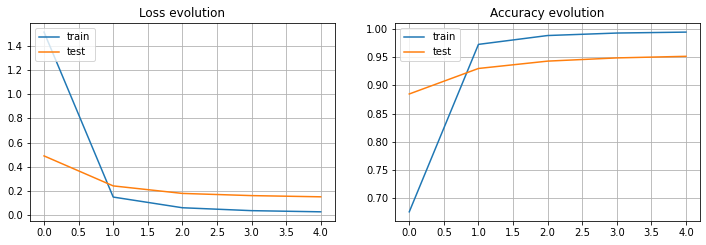

In [22]:
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results = model.fit_generator(
        train_generator, #training set
        steps_per_epoch = len(train_generator), 
        epochs=40, #number of epochs 
        validation_data = validation_generator, #testing set
        validation_steps = len(validation_generator),
        callbacks=[callback]
        )

#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(training_results.history['loss'], label='Loss')
plt.plot(training_results.history['val_loss'], label='val_Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(training_results.history['acc'], label='accuracy')
plt.plot(training_results.history['val_acc'], label='val_accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.title('Accuracy evolution')

model.save('/content/drive/MyDrive/ColabNotebooks/PreTrained/',save_format='tf')

In [23]:
 model.save('/content/drive/MyDrive/ColabNotebooks/PreTrained/',save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ColabNotebooks/PreTrained/assets


##### Evaluation Metrics

In [28]:
new_InceptionV3 = keras.models.load_model('/content/drive/MyDrive/ColabNotebooks/PreTrained/')

In [29]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/ATest.png')
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])

classes = new_InceptionV3.predict(img)

In [30]:
import time

t1 = time.time()
classes = new_InceptionV3.predict(img)
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 0.07482099533081055 seconds


In [32]:
#try your own image..

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
# used to rescale the pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)
img = load_img('/content/drive/MyDrive/ColabNotebooks/ATest.png', target_size=(200, 200))
img2 = load_img('/content/drive/MyDrive/ColabNotebooks/L.png', target_size=(200, 200))
img3 = load_img('/content/drive/MyDrive/ColabNotebooks/G.png', target_size=(200, 200))
img4 = load_img('/content/drive/MyDrive/ColabNotebooks/R.png', target_size=(200, 200))

# convert to array
img = img_to_array(img)
img2 = img_to_array(img2)
img3 = img_to_array(img3)
img4 = img_to_array(img4)
# reshape into a single sample with 3 channels

img = img.reshape(-1, 200, 200, 3)
img = img.astype('float32')
img = datagen.standardize(img)

img2 = img2.reshape(-1, 200, 200, 3)
img2 = img2.astype('float32')
img2 = datagen.standardize(img2)

img3 = img3.reshape(-1, 200, 200, 3)
img3 = img3.astype('float32')
img3 = datagen.standardize(img3)

img4 = img4.reshape(-1, 200, 200, 3)
img4 = img4.astype('float32')
img4 = datagen.standardize(img4)

# predict the class  
result = new_InceptionV3.predict(img)
result2 = new_InceptionV3.predict(img2)
result3 = new_InceptionV3.predict(img3)
result4 = new_InceptionV3.predict(img4)
print(result.argmax())
print(result2.argmax())
print(result3.argmax())
print(result4.argmax())

4
11
7
17


Predictions:


*   'A' is predicted as 'E'
*   'L' is predicted correctly
*   'G' is predicted as 'H'
*   'R' is predicted correctly

In [33]:
test_generator.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [34]:
plt.figure(figsize=(20,38))
classes = os.listdir(test_path)
for i in enumerate(classes):
    image = os.listdir(test_path+i[1])[0]
    image = Image.open(test_path+i[1]+'/'+image)
    image = np.asarray(image)
    image = image/255

    plt.subplot(10,3,i[0]+1)
    plt.imshow(image)

    pred = np.argmax(new_InceptionV3.predict(image.reshape(-1,200,200,3)))
    for j in train_data.class_indices:
        if pred == train_data.class_indices[j]:
            prediction=j
        else:
            continue

    plt.title('Actual:{0} / Predicted:{1}'.format(i[1],prediction))

### MobileNetV2 Pre-Trained Model

In [36]:
# loading in the weighted file -- MonileNetV2
MobileNet_v2_model = tf.keras.applications.MobileNetV2(
    input_shape = (200, 200, 3), 
    include_top = False, 
    weights = 'imagenet'
)

9420800/9406464 [==============================] - 0s 0us/step


In [39]:
#inception_output_layer = inception_v3_model.get_layer('mixed7')
#print('Inception model output shape:', inception_output_layer.output_shape)

MobileNet_output = MobileNet_v2_model.output

In [41]:
x = layers.GlobalAveragePooling2D()(MobileNet_output)
x = layers.Dense(1024, activation='relu')(x)                  
x = layers.Dense(26, activation='softmax')(x)           

modelMN2 = Model(MobileNet_v2_model.input, x) 

modelMN2.compile(
    optimizer=SGD(lr=0.0001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['acc']
)
for layer in modelMN2.layers[:249]:
    layer.trainable = False
for layer in modelMN2.layers[249:]:
    layer.trainable = True

Epoch 1/40
1944/1944 [==============================] - 959s 491ms/step - loss: 1.1378 - acc: 0.7614 - val_loss: 0.4270 - val_acc: 0.8895
Epoch 2/40
1944/1944 [==============================] - 943s 485ms/step - loss: 0.0941 - acc: 0.9866 - val_loss: 0.1803 - val_acc: 0.9489
Epoch 3/40
1944/1944 [==============================] - 948s 488ms/step - loss: 0.0408 - acc: 0.9946 - val_loss: 0.1476 - val_acc: 0.9546

Reached 95.0 accuracy, Stopping!
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ColabNotebooks/MobileNetV2/assets


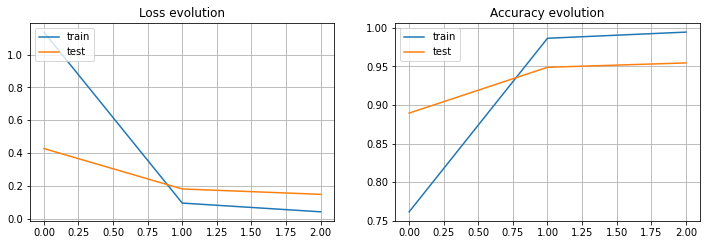

In [44]:
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_resultsMN2 = modelMN2.fit_generator(
        train_generator, #training set
        steps_per_epoch = len(train_generator), 
        epochs=40, #number of epochs 
        validation_data = validation_generator, #testing set
        validation_steps = len(validation_generator),
        callbacks=[callback]
        )

#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(training_resultsMN2.history['loss'], label='Loss')
plt.plot(training_resultsMN2.history['val_loss'], label='val_Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(training_resultsMN2.history['acc'], label='accuracy')
plt.plot(training_resultsMN2.history['val_acc'], label='val_accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.title('Accuracy evolution')

modelMN2.save('/content/drive/MyDrive/ColabNotebooks/MobileNetV2/',save_format='tf')

In [45]:
 modelMN2.save('/content/drive/MyDrive/ColabNotebooks/MobileNetV2/',save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ColabNotebooks/MobileNetV2/assets


In [46]:
new_MobileNetV2 = keras.models.load_model('/content/drive/MyDrive/ColabNotebooks/MobileNetV2/')

In [47]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/ATest.png')
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])

classesMN2 = new_MobileNetV2.predict(img)

In [48]:
t1 = time.time()
classes = new_MobileNetV2.predict(img)
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 0.07074284553527832 seconds


In [49]:
#try your own image..
# used to rescale the pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)
img = load_img('/content/drive/MyDrive/ColabNotebooks/ATest.png', target_size=(200, 200))
img2 = load_img('/content/drive/MyDrive/ColabNotebooks/L.png', target_size=(200, 200))
img3 = load_img('/content/drive/MyDrive/ColabNotebooks/G.png', target_size=(200, 200))
img4 = load_img('/content/drive/MyDrive/ColabNotebooks/R.png', target_size=(200, 200))

# convert to array
img = img_to_array(img)
img2 = img_to_array(img2)
img3 = img_to_array(img3)
img4 = img_to_array(img4)
# reshape into a single sample with 3 channels

img = img.reshape(-1, 200, 200, 3)
img = img.astype('float32')
img = datagen.standardize(img)

img2 = img2.reshape(-1, 200, 200, 3)
img2 = img2.astype('float32')
img2 = datagen.standardize(img2)

img3 = img3.reshape(-1, 200, 200, 3)
img3 = img3.astype('float32')
img3 = datagen.standardize(img3)

img4 = img4.reshape(-1, 200, 200, 3)
img4 = img4.astype('float32')
img4 = datagen.standardize(img4)

# predict the class  
result = new_MobileNetV2.predict(img)
result2 = new_MobileNetV2.predict(img2)
result3 = new_MobileNetV2.predict(img3)
result4 = new_MobileNetV2.predict(img4)
print(result.argmax())
print(result2.argmax())
print(result3.argmax())
print(result4.argmax())

18
24
7
23


Predictions:


*   'A' is predicted as 'S'
*   'L' is predicted as 'Y'
*   'G' is predicted as 'H'
*   'R' is predicted as 'X'

In [50]:
test_generator.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

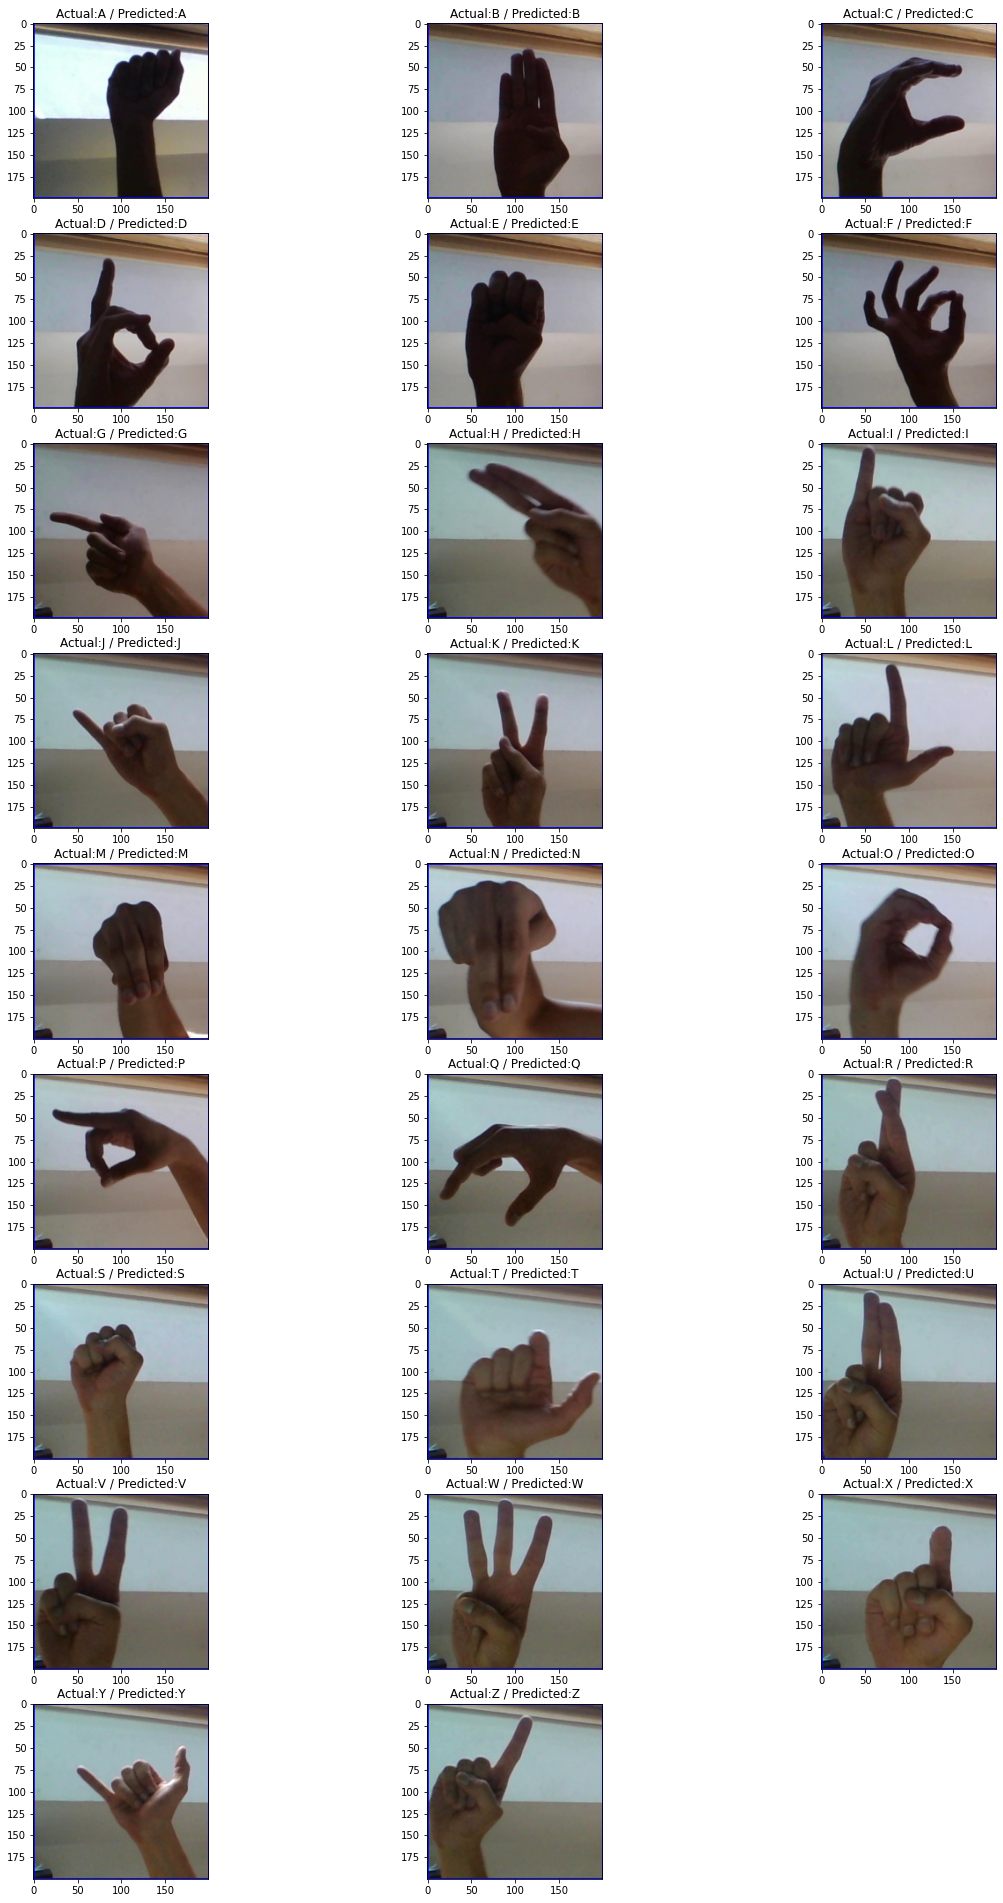

In [51]:
plt.figure(figsize=(20,38))
classes = os.listdir(test_path)
for i in enumerate(classes):
    image = os.listdir(test_path+i[1])[0]
    image = Image.open(test_path+i[1]+'/'+image)
    image = np.asarray(image)
    image = image/255

    plt.subplot(10,3,i[0]+1)
    plt.imshow(image)

    pred = np.argmax(new_MobileNetV2.predict(image.reshape(-1,200,200,3)))
    for j in train_data.class_indices:
        if pred == train_data.class_indices[j]:
            prediction=j
        else:
            continue

    plt.title('Actual:{0} / Predicted:{1}'.format(i[1],prediction))

### VGG19 Pre-Trained Model

In [25]:
# loading in the weighted file -- MonileNetV2
VGG19_model = tf.keras.applications.VGG19(
    input_shape = (200, 200, 3), 
    include_top = False, 
    weights = 'imagenet'
)

80150528/80134624 [==============================] - 0s 0us/step


In [53]:
VGG19_output = VGG19_model.output

In [54]:
x = layers.GlobalAveragePooling2D()(VGG19_output)
x = layers.Dense(1024, activation='relu')(x)                  
x = layers.Dense(26, activation='softmax')(x)           

modelVGG = Model(VGG19_model.input, x) 

modelVGG.compile(
    optimizer=SGD(lr=0.0001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['acc']
)
for layer in modelVGG.layers[:249]:
    layer.trainable = False
for layer in modelVGG.layers[249:]:
    layer.trainable = True

Epoch 1/40
1944/1944 [==============================] - 989s 506ms/step - loss: 1.0702 - acc: 0.6878 - val_loss: 0.2890 - val_acc: 0.9018
Epoch 2/40
1944/1944 [==============================] - 945s 486ms/step - loss: 0.0348 - acc: 0.9894 - val_loss: 0.2428 - val_acc: 0.9216
Epoch 3/40
1944/1944 [==============================] - 961s 494ms/step - loss: 0.0136 - acc: 0.9962 - val_loss: 0.2495 - val_acc: 0.9249
Epoch 4/40
1944/1944 [==============================] - 968s 498ms/step - loss: 0.0076 - acc: 0.9979 - val_loss: 0.2180 - val_acc: 0.9390
Epoch 5/40
1944/1944 [==============================] - 991s 510ms/step - loss: 0.0053 - acc: 0.9985 - val_loss: 0.2061 - val_acc: 0.9440
Epoch 6/40
1944/1944 [==============================] - 1002s 515ms/step - loss: 0.0051 - acc: 0.9985 - val_loss: 0.1785 - val_acc: 0.9465
Epoch 7/40
1944/1944 [==============================] - 1002s 515ms/step - loss: 0.0044 - acc: 0.9987 - val_loss: 0.2663 - val_acc: 0.9299
Epoch 8/40
1944/1944 [==========

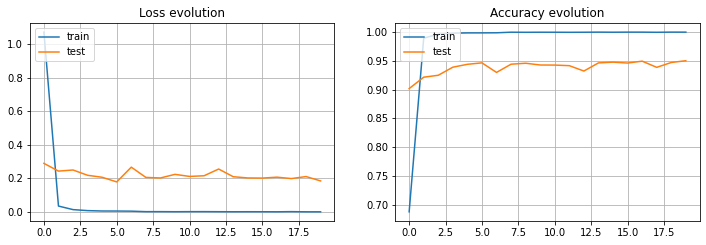

In [55]:
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_resultsVGG = modelVGG.fit_generator(
        train_generator, #training set
        steps_per_epoch = len(train_generator), 
        epochs=40, #number of epochs 
        validation_data = validation_generator, #testing set
        validation_steps = len(validation_generator),
        callbacks=[callback]
        )

#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(training_resultsVGG.history['loss'], label='Loss')
plt.plot(training_resultsVGG.history['val_loss'], label='val_Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(training_resultsVGG.history['acc'], label='accuracy')
plt.plot(training_resultsVGG.history['val_acc'], label='val_accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.title('Accuracy evolution')

modelVGG.save('/content/drive/MyDrive/ColabNotebooks/VGG19/',save_format='tf')

In [16]:
new_VGG19 = keras.models.load_model('/content/drive/MyDrive/ColabNotebooks/VGG19/')

In [17]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/ATest.png')
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])

classesVGG = new_VGG19.predict(img)

In [18]:
t1 = time.time()
classesVGG = new_VGG19.predict(img)
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 0.04481387138366699 seconds


In [20]:
#try your own image..
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
# used to rescale the pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)
img = load_img('/content/drive/MyDrive/ColabNotebooks/ATest.png', target_size=(200, 200))
img2 = load_img('/content/drive/MyDrive/ColabNotebooks/L.png', target_size=(200, 200))
img3 = load_img('/content/drive/MyDrive/ColabNotebooks/G.png', target_size=(200, 200))
img4 = load_img('/content/drive/MyDrive/ColabNotebooks/R.png', target_size=(200, 200))

# convert to array
img = img_to_array(img)
img2 = img_to_array(img2)
img3 = img_to_array(img3)
img4 = img_to_array(img4)
# reshape into a single sample with 3 channels

img = img.reshape(-1, 200, 200, 3)
img = img.astype('float32')
img = datagen.standardize(img)

img2 = img2.reshape(-1, 200, 200, 3)
img2 = img2.astype('float32')
img2 = datagen.standardize(img2)

img3 = img3.reshape(-1, 200, 200, 3)
img3 = img3.astype('float32')
img3 = datagen.standardize(img3)

img4 = img4.reshape(-1, 200, 200, 3)
img4 = img4.astype('float32')
img4 = datagen.standardize(img4)

# predict the class  
result = new_VGG19.predict(img)
result2 = new_VGG19.predict(img2)
result3 = new_VGG19.predict(img3)
result4 = new_VGG19.predict(img4)
print(result.argmax())
print(result2.argmax())
print(result3.argmax())
print(result4.argmax())

0
11
15
17


Predictions:


*   'A' is predicted correctly
*   'L' is predicted correctly
*   'G' is predicted as 'P'
*   'R' is predicted correctly

In [21]:
test_generator.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

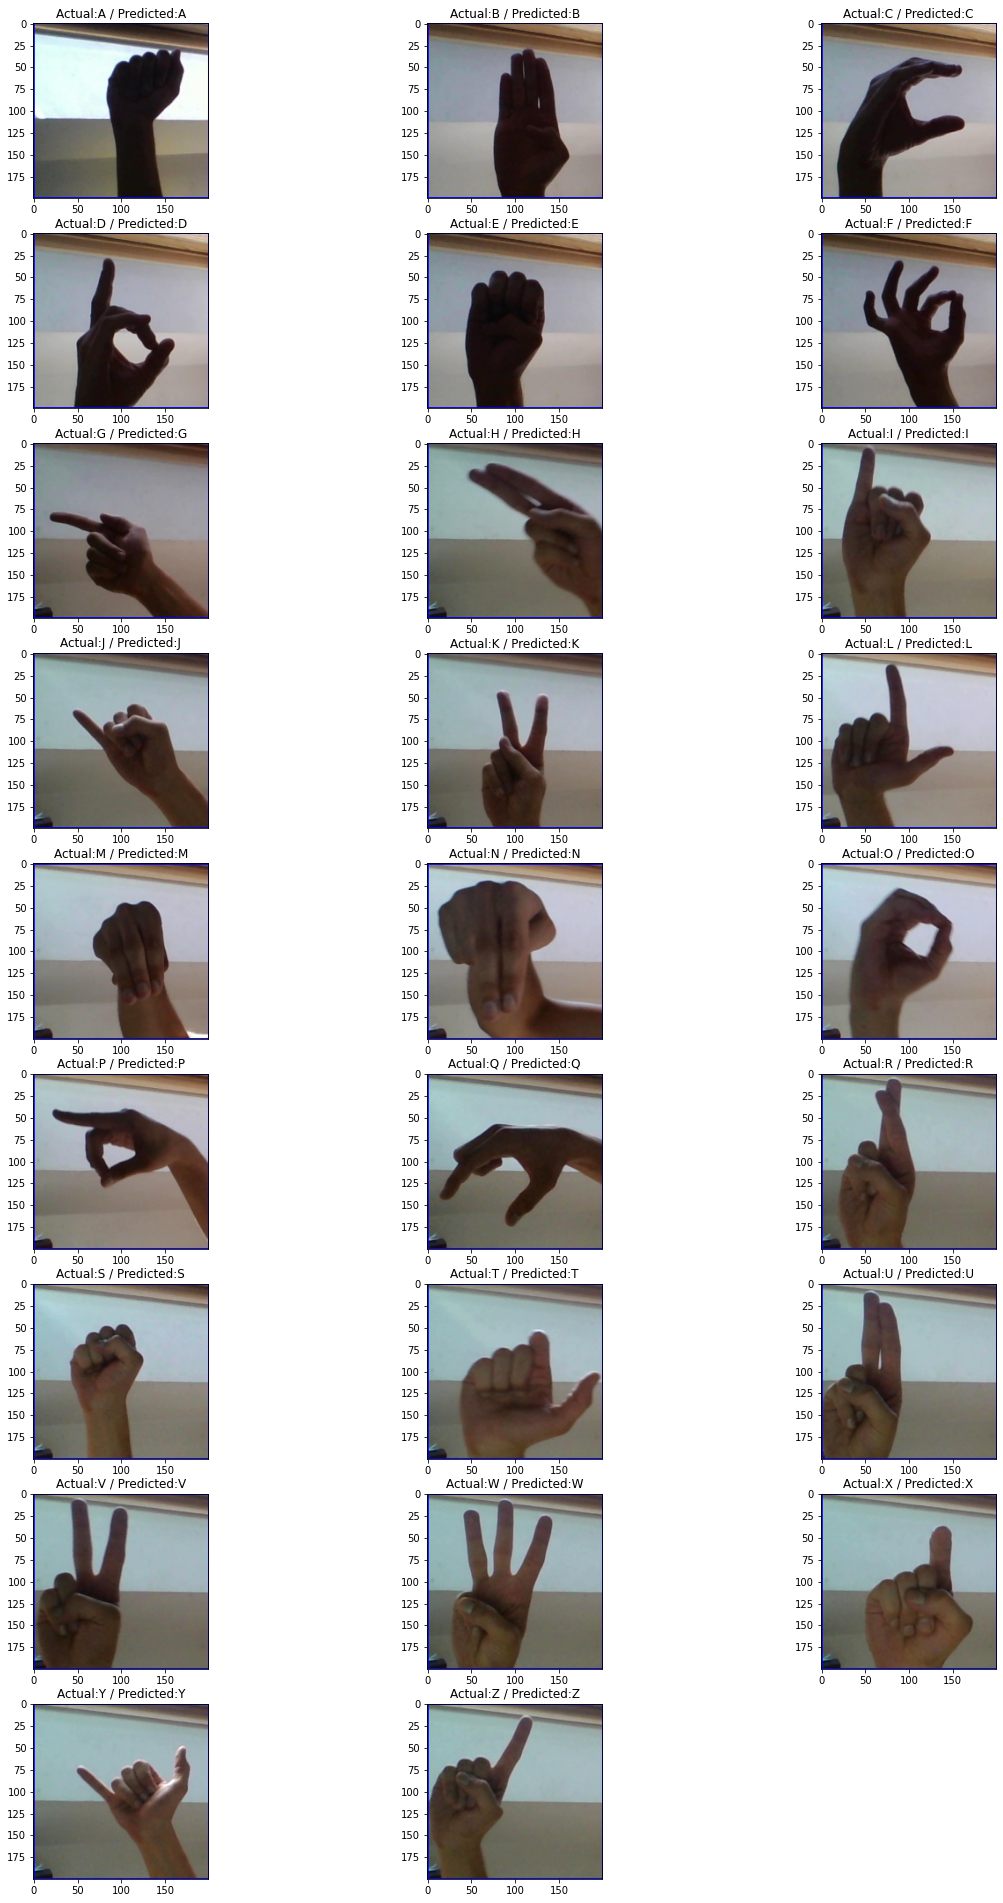

In [22]:
plt.figure(figsize=(20,38))
classes = os.listdir(test_path)
for i in enumerate(classes):
    image = os.listdir(test_path+i[1])[0]
    image = Image.open(test_path+i[1]+'/'+image)
    image = np.asarray(image)
    image = image/255

    plt.subplot(10,3,i[0]+1)
    plt.imshow(image)

    pred = np.argmax(new_VGG19.predict(image.reshape(-1,200,200,3)))
    for j in train_data.class_indices:
        if pred == train_data.class_indices[j]:
            prediction=j
        else:
            continue

    plt.title('Actual:{0} / Predicted:{1}'.format(i[1],prediction))

### ResNet50 Pre-Trained Model

In [15]:
# loading in the weighted file -- MonileNetV2
ResNet50V2_model = tf.keras.applications.ResNet50V2(
    input_shape = (200, 200, 3), 
    include_top = False, 
    weights = 'imagenet'
)

94683136/94668760 [==============================] - 1s 0us/step


In [16]:
ResNet50V2_output = ResNet50V2_model.output

In [19]:
from tensorflow.keras import layers
x = layers.GlobalAveragePooling2D()(ResNet50V2_output)
x = layers.Dense(1024, activation='relu')(x)                  
x = layers.Dense(26, activation='softmax')(x)           

modelResNet50V2 = Model(ResNet50V2_model.input, x) 

modelResNet50V2.compile(
    optimizer=SGD(lr=0.0001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['acc']
)
for layer in modelResNet50V2.layers[:249]:
    layer.trainable = False
for layer in modelResNet50V2.layers[249:]:
    layer.trainable = True

In [23]:
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_resultsResNet50V2 = modelResNet50V2.fit_generator(
        train_generator, #training set
        steps_per_epoch = len(train_generator), 
        epochs=40, #number of epochs 
        validation_data = validation_generator, #testing set
        validation_steps = len(validation_generator),
        callbacks=[callback]
        )

#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(training_resultsResNet50V2.history['loss'], label='Loss')
plt.plot(training_resultsResNet50V2.history['val_loss'], label='val_Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(training_resultsResNet50V2.history['acc'], label='accuracy')
plt.plot(training_resultsResNet50V2.history['val_acc'], label='val_accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.title('Accuracy evolution')

modelResNet50V2.save('/content/drive/MyDrive/ColabNotebooks/ResNet50V2/',save_format='tf')

Epoch 1/40
1944/1944 [==============================] - 24851s 13s/step - loss: 1.7426 - acc: 0.5843 - val_loss: 1.6455 - val_acc: 0.5936
Epoch 2/40
1944/1944 [==============================] - 748s 385ms/step - loss: 0.8279 - acc: 0.8212 - val_loss: 1.2809 - val_acc: 0.6786
Epoch 3/40
1944/1944 [==============================] - 744s 383ms/step - loss: 0.5931 - acc: 0.8716 - val_loss: 1.1238 - val_acc: 0.6987
Epoch 4/40
1944/1944 [==============================] - 745s 383ms/step - loss: 0.4769 - acc: 0.8953 - val_loss: 1.0290 - val_acc: 0.7218
Epoch 5/40
1944/1944 [==============================] - 743s 382ms/step - loss: 0.4029 - acc: 0.9125 - val_loss: 0.9692 - val_acc: 0.7351
Epoch 6/40
1944/1944 [==============================] - 740s 380ms/step - loss: 0.3569 - acc: 0.9193 - val_loss: 0.9177 - val_acc: 0.7490
Epoch 7/40
1944/1944 [==============================] - 740s 381ms/step - loss: 0.3198 - acc: 0.9282 - val_loss: 0.8874 - val_acc: 0.7538
Epoch 8/40
1944/1944 [============

In [24]:
new_ResNet50V2 = keras.models.load_model('/content/drive/MyDrive/ColabNotebooks/ResNet50V2/')

In [25]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/ATest.png')
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])

classesResNet50V2 = new_ResNet50V2.predict(img)

In [26]:
t1 = time.time()
classesResNet50V2 = new_ResNet50V2.predict(img)
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 0.04871869087219238 seconds


In [27]:
#try your own image..
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
# used to rescale the pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)
img = load_img('/content/drive/MyDrive/ColabNotebooks/ATest.png', target_size=(200, 200))
img2 = load_img('/content/drive/MyDrive/ColabNotebooks/L.png', target_size=(200, 200))
img3 = load_img('/content/drive/MyDrive/ColabNotebooks/G.png', target_size=(200, 200))
img4 = load_img('/content/drive/MyDrive/ColabNotebooks/R.png', target_size=(200, 200))

# convert to array
img = img_to_array(img)
img2 = img_to_array(img2)
img3 = img_to_array(img3)
img4 = img_to_array(img4)
# reshape into a single sample with 3 channels

img = img.reshape(-1, 200, 200, 3)
img = img.astype('float32')
img = datagen.standardize(img)

img2 = img2.reshape(-1, 200, 200, 3)
img2 = img2.astype('float32')
img2 = datagen.standardize(img2)

img3 = img3.reshape(-1, 200, 200, 3)
img3 = img3.astype('float32')
img3 = datagen.standardize(img3)

img4 = img4.reshape(-1, 200, 200, 3)
img4 = img4.astype('float32')
img4 = datagen.standardize(img4)

# predict the class  
result = new_ResNet50V2.predict(img)
result2 = new_ResNet50V2.predict(img2)
result3 = new_ResNet50V2.predict(img3)
result4 = new_ResNet50V2.predict(img4)
print(result.argmax())
print(result2.argmax())
print(result3.argmax())
print(result4.argmax())

0
9
6
23


Predictions:


*   'A' is predicted correctly
*   'L' is predicted as 'J'
*   'G' is predicted correctly
*   'R' is predicted as 'X'

In [28]:
test_generator.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

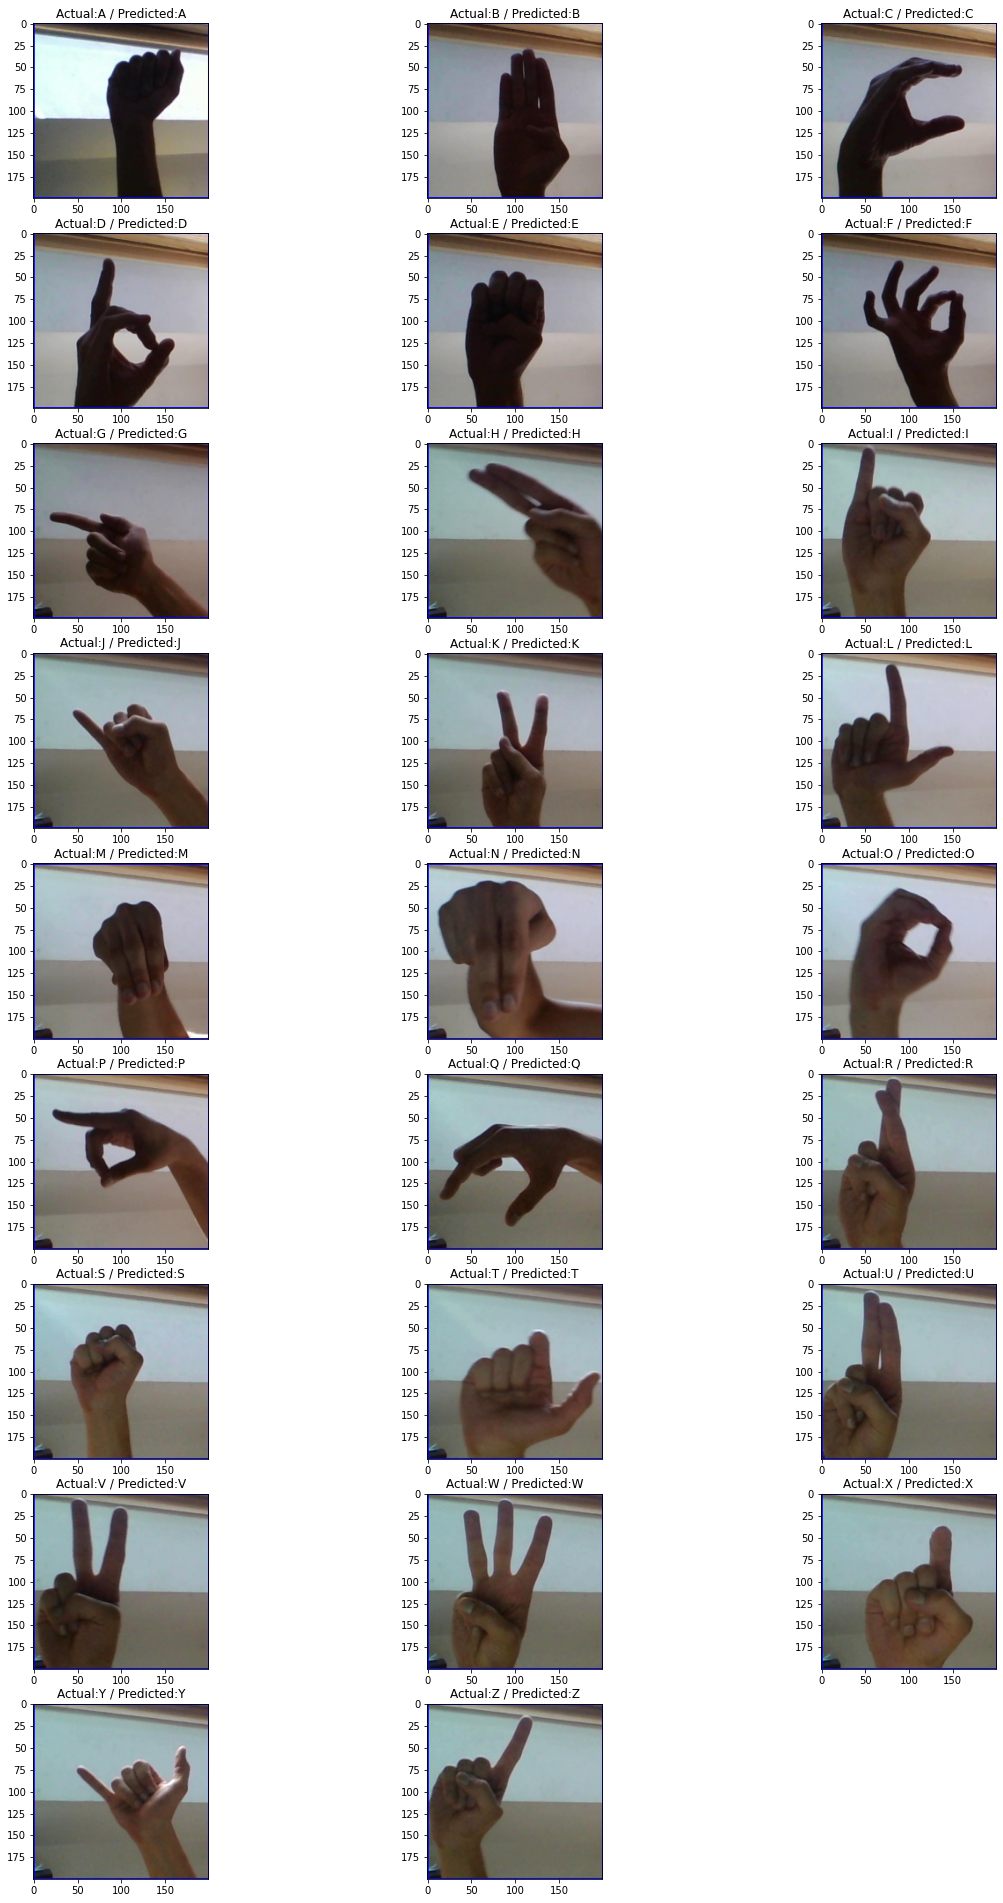

In [29]:
plt.figure(figsize=(20,38))
classes = os.listdir(test_path)
for i in enumerate(classes):
    image = os.listdir(test_path+i[1])[0]
    image = Image.open(test_path+i[1]+'/'+image)
    image = np.asarray(image)
    image = image/255

    plt.subplot(10,3,i[0]+1)
    plt.imshow(image)

    pred = np.argmax(new_ResNet50V2.predict(image.reshape(-1,200,200,3)))
    for j in train_data.class_indices:
        if pred == train_data.class_indices[j]:
            prediction=j
        else:
            continue

    plt.title('Actual:{0} / Predicted:{1}'.format(i[1],prediction))

### EfficientNetB0 Pre-Trained Model